# Introduction to Convolutional Neural Networks
<!--<badge>--><a href="https://colab.research.google.com/github/TheAIDojo/AI_4_Climate_Bootcamp/blob/main/Week 03 - Introduction to Computer Vision/1. Introduction to CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

In this notebook, we will explore the basics of convolutional neural networks (CNNs) and their applications in the field of climate change. We will be using the popular Python libraries such as Numpy, Pandas, TensorFlow, Scikit Learn, and TensorBoard to build and train our models.

CNNs are a type of neural network that are commonly used in image and video analysis, and have been shown to be highly effective in tasks such as object recognition, image classification, and object detection. In the context of climate change, CNNs can be used to analyze satellite imagery and other data to better understand and predict changes in the Earth's climate.

Before diving into CNNs, it is important to have a basic understanding of neural networks and how they work. If you are new to neural networks, we recommend starting with a tutorial on basic neural networks before continuing with this notebook.

## Table of Contents <a name="toc"></a>
* [Understanding the structure of a CNN](#intro)
* [Fashion MNIST CNN](#cn_tf)

## Understanding the structure of a CNN <a name="intro"></a>
[Back to Top](#toc)

CNNs consist of multiple layers, including convolutional layers, pooling layers, and fully connected layers. The convolutional layers are responsible for extracting features from the input image, such as edges and textures. The pooling layers are used to reduce the dimensionality of the feature maps, while the fully connected layers are used to classify the image based on the features extracted.

During the training process, the CNN learns the weights and biases of the filters in the convolutional layers. These filters are used to convolve over the input image and extract features. The training process also involves adjusting the weights and biases of the fully connected layers to improve the classification accuracy.

### Convolution Layers <a name="conv"></a>
[Back to Top](#toc)

A convolutional filter is a small matrix that slides across the input image, performing a mathematical operation at each location. The output of the convolution is a new image, called a feature map, which highlights certain features of the input image.

For example, a filter that detects edges in an image will produce a feature map where the pixels have high values where edges are present and low values where edges are not present. By applying multiple filters with different properties, a CNN can extract multiple features from the input image.

The process of convolution can be thought of as a way to "localize" features in an image. By moving the filter across the image, the CNN can detect features at different positions in the image. This is in contrast to fully connected layers, which treat all pixels in the image as a single vector and do not take into account the spatial relationships between pixels.

In Keras, the Conv2D layer is used to create convolutional layers in a CNN. The main parameters of this layer are the number of filters, the stride, and the padding. The number of filters determines how many feature maps are created by the convolution, the stride controls the step size of the filter when moving across the image, and the padding controls the amount of blank space added to the edges of the image before the convolution is applied.

### Pooling Layers <a name="pool"></a>
[Back to Top](#toc)

Another important component of CNNs are pooling layers. Pooling layers are used to downsize the spatial dimensions of the feature maps, while keeping the most important features.

The most common type of pooling is max pooling, in which the maximum value of a group of pixels is selected and used as the output. This has the effect of reducing the spatial resolution of the feature map, while retaining the most important features.

There are also other types of pooling, such as average pooling, which takes the average value of a group of pixels, and min pooling, which takes the minimum value.

The main advantage of using pooling layers is that they decrease the computational cost of the CNN and make it more robust to small translations of the input. By down-sampling the feature maps, pooling layers also make the CNN more tolerant to small variations in the position of the features.

Pooling layers also make the CNN less sensitive to small changes in the input, which makes it more robust to noise and small variations in the position of the features. In addition, pooling layers also help to reduce overfitting by reducing the number of parameters in the model.

We can stack multiple `Conv2D` and `MaxPooling` layers to create a deep CNN.

### Fully Connected Layers (Dense) <a name="fcn"></a>
[Back to Top](#toc)

After the convolutional and pooling layers, the final stage of a CNN is the fully connected layers. These layers take the output of the previous layers and use it to make a prediction.

In fully connected layers, each neuron in the layer is connected to every neuron in the previous layer. This allows the network to learn complex, non-linear relationships between the features extracted by the convolutional and pooling layers.

The output of the fully connected layers is usually passed through an activation function, such as sigmoid or softmax, to produce a probability distribution over the possible classes.

## Fashion MNIST CNN <a name="cn_tf"></a>
[Back to Top](#toc)

we will be working with the Fashion MNIST dataset, which consists of 60,000 28x28 grayscale images of clothing items and 10 classes. This dataset is a great starting point for learning about CNNs, as it is a relatively simple dataset with clear class labels.

We will be using the TensorFlow and Keras libraries in Python to train and evaluate our CNNs. We will cover the different layers and techniques used in CNNs, such as convolutional layers, pooling layers, and fully connected layers.


In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [16]:
# load the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# show the shape of the data
print('x_train shape:', x_train.shape, 'y_train shape:', y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [5]:
# create index labels dictionary
index_labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

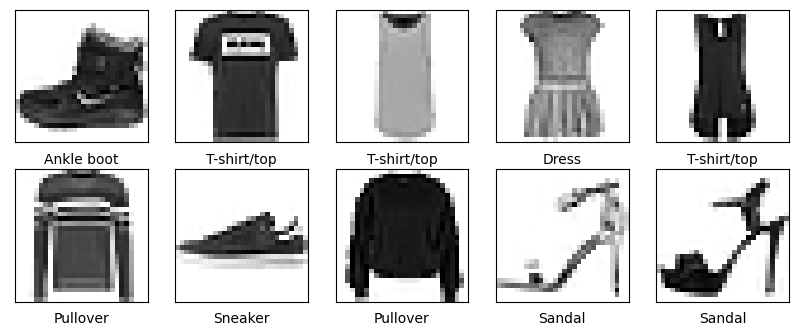

In [6]:
# plot the first 10 images in the training set and their labels
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(index_labels[y_train[i]])

In [7]:
# normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
# one-hot encode the labels
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

In [12]:
# rewrite the model in the previous cell in sequential API
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_normal', input_shape=(28,28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

# print a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)        

In [13]:
# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [14]:
# create an early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# train the model
model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/20
938/938 [==============================] - 22s 23ms/step - loss: 0.5125 - categorical_accuracy: 0.8126 - val_loss: 0.3362 - val_categorical_accuracy: 0.8799
Epoch 2/20
938/938 [==============================] - 20s 22ms/step - loss: 0.3384 - categorical_accuracy: 0.8769 - val_loss: 0.2897 - val_categorical_accuracy: 0.8944
Epoch 3/20
938/938 [==============================] - 21s 22ms/step - loss: 0.2952 - categorical_accuracy: 0.8911 - val_loss: 0.2621 - val_categorical_accuracy: 0.9065
Epoch 4/20
938/938 [==============================] - 21s 22ms/step - loss: 0.2701 - categorical_accuracy: 0.9006 - val_loss: 0.2491 - val_categorical_accuracy: 0.9045
Epoch 5/20
938/938 [==============================] - 22s 23ms/step - loss: 0.2541 - categorical_accuracy: 0.9059 - val_loss: 0.2416 - val_categorical_accuracy: 0.9139
Epoch 6/20
938/938 [==============================] - 22s 24ms/step - loss: 0.2404 - categorical_accuracy: 0.9117 - val_loss: 0.2441 - val_categorical_accuracy: